# 准备

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

线上下载

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

#y -= y.mean()

In [2]:
df = pd.read_csv('/Users/chanson/mine/m/book/16/california_housing.csv')
df.shape

(20640, 9)

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
feature_names = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
    'Latitude', 'Longitude'
]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_names],
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
gbdt = GradientBoostingRegressor()

gbdt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# plot_single_column_pdp

In [17]:
%run single_column_pdp.py

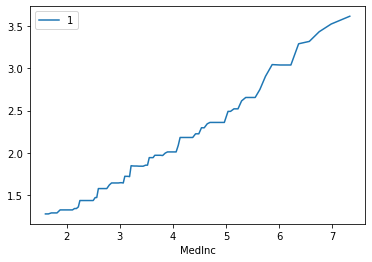

In [18]:
plot_single_column_pdp(gbdt,X_train,'MedInc')

## plot_partial_dependence

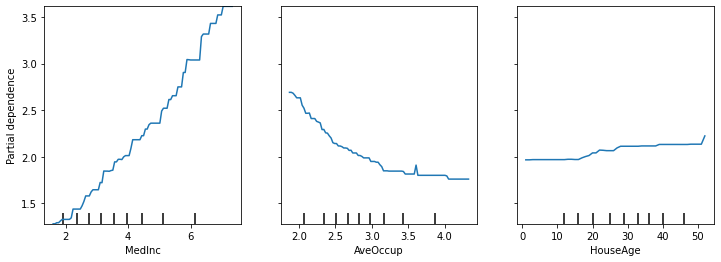

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(gbdt,
                        X_train, ['MedInc', 'AveOccup', 'HouseAge'],
                        method='brute',
                        ax=ax)

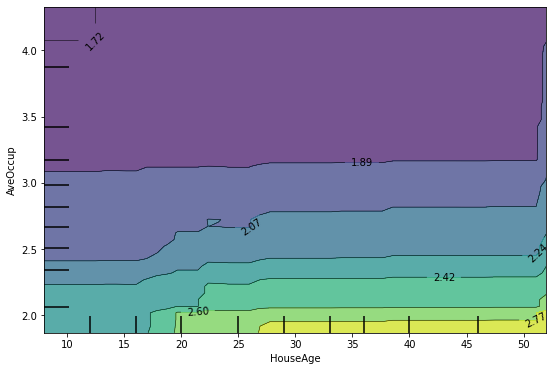

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_partial_dependence(gbdt,
                        X_train, [('HouseAge', 'AveOccup')],
                        grid_resolution=50,
                        method='brute',
                        ax=ax)

# pdpbox

In [11]:
from pdpbox import pdp

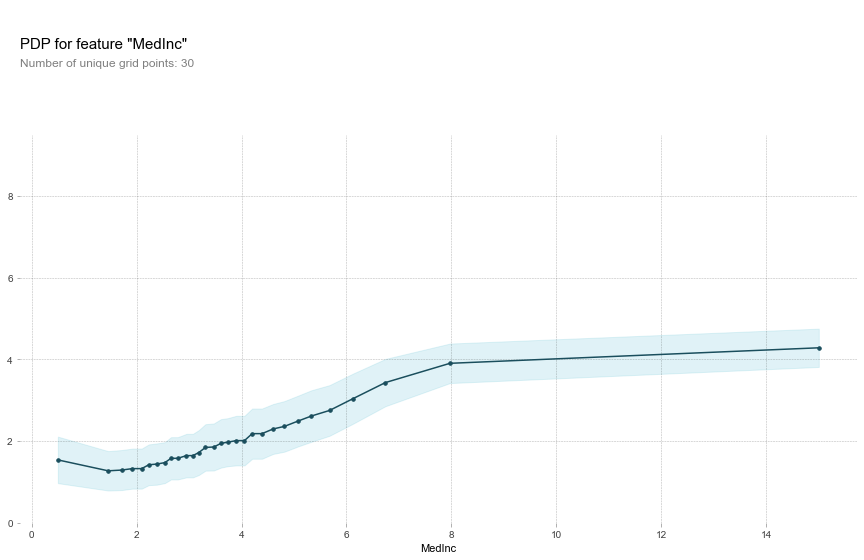

In [12]:
pdp_MedInc = pdp.pdp_isolate(model=gbdt,
                             dataset=X_train,
                             model_features=X_train.columns.tolist(),
                             feature='MedInc',
                             num_grid_points=30)
_ = pdp.pdp_plot(
    pdp_MedInc,
    'MedInc',
    center=False,
)

## ICE

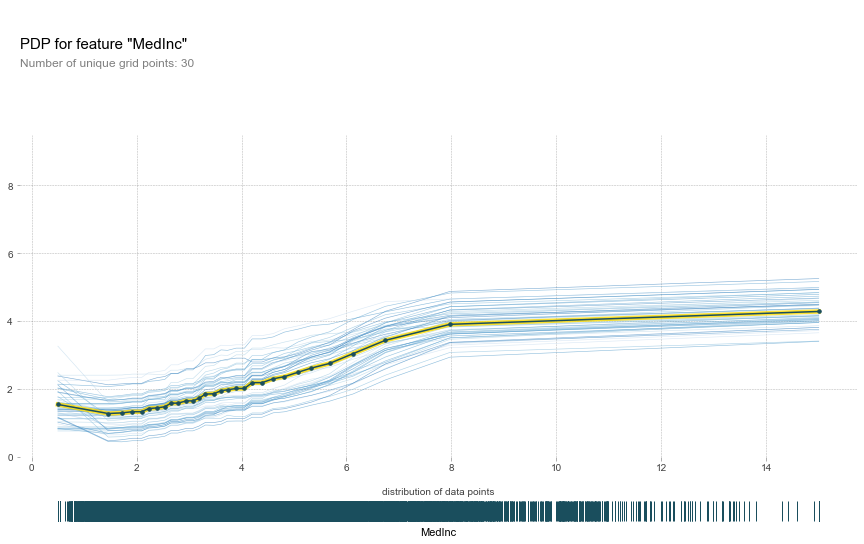

In [20]:
_ = pdp.pdp_plot(pdp_MedInc,
                 'MedInc',
                 center=False,
                 plot_lines=True,
                 frac_to_plot=50,
                 plot_pts_dist=True)

## info_plots

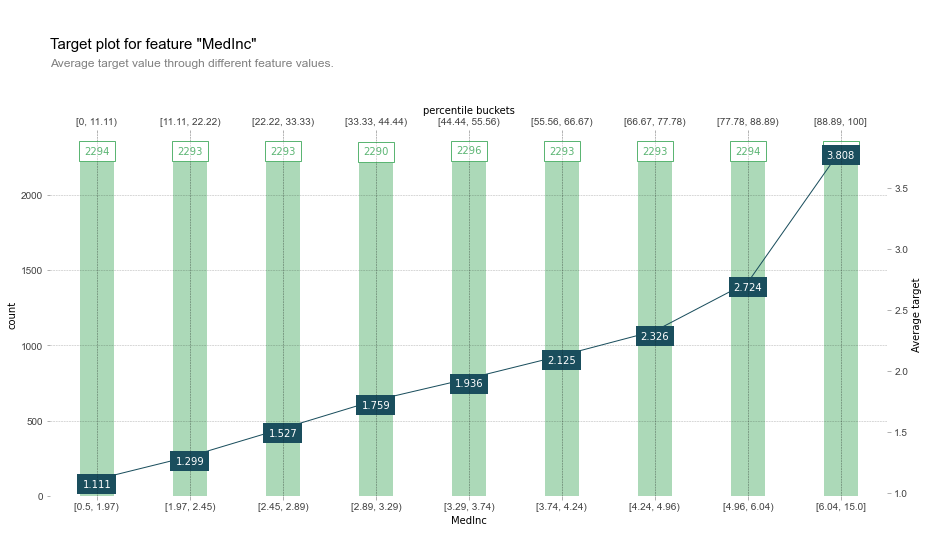

In [19]:
from pdpbox import info_plots

fig, axes, summary_df = info_plots.target_plot(df=df,
                                               feature='MedInc',
                                               feature_name='MedInc',
                                               target='target',
                                               show_percentile=True)

# Treeinterpreter

In [21]:
import numpy as np
from sklearn.datasets import load_boston
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor

In [22]:
boston = load_boston()
rf = RandomForestRegressor(random_state=42)
rf.fit(boston.data[:300], boston.target[:300])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
instances = boston.data[[300, 309]]
rf.predict(instances)

array([29.729, 23.315])

In [24]:
prediction, bias, contributions = ti.predict(rf, instances)
for i in range(len(instances)):
    print("Instance {} : {:.2f}".format(i,prediction[i][0]))
    print("Bias (trainset mean) {:.2f}".format(bias[i]))
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], boston.feature_names),
                             key=lambda x: -abs(x[0])):
        print('{}{} {:.2f}'.format(' '*4 ,feature, c))
    print("-" * 30)

Instance 0 : 29.73
Bias (trainset mean) 25.56
Feature contributions:
    RM 3.43
    LSTAT 1.13
    DIS -0.51
    PTRATIO 0.43
    TAX -0.35
    B -0.19
    RAD 0.15
    CRIM -0.13
    AGE 0.11
    INDUS 0.09
    ZN 0.06
    NOX -0.05
    CHAS 0.02
------------------------------
Instance 1 : 23.32
Bias (trainset mean) 25.56
Feature contributions:
    RM -5.49
    LSTAT 2.56
    CRIM 0.54
    TAX -0.19
    PTRATIO 0.17
    DIS 0.11
    RAD 0.06
    INDUS 0.06
    B -0.04
    NOX 0.04
    CHAS -0.03
    AGE -0.02
    ZN 0.00
------------------------------


In [34]:
# Set default matplotlib settings
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16

# Set seaborn colours
sns.set_style('darkgrid')
sns.set_palette('colorblind')
blue, green, red, purple, yellow, cyan = sns.color_palette('colorblind',6)

In [27]:
from tree_interp_functions import *

In [30]:
t_df = pd.DataFrame(boston.data[300:],columns=boston.feature_names)

In [32]:
prediction_t, bias_t, contributions_t = ti.predict(rf, boston.data[300:])

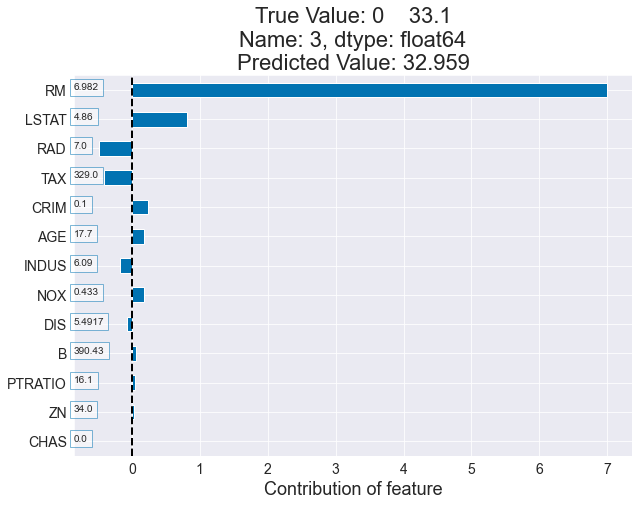

In [35]:
df, true_label, score = plot_obs_feature_contrib(rf,
                                                 contributions_t,
                                                 t_df,
                                                 pd.DataFrame(boston.target[300:]),
                                                 3,
                                                 order_by='contribution',
                                                 
                                                )

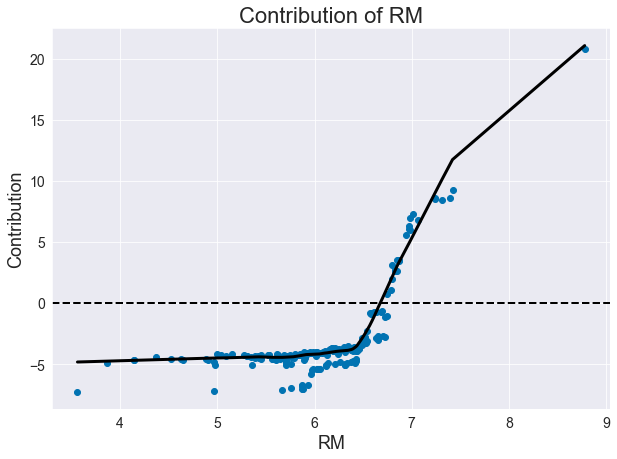

In [36]:
plot_single_feat_contrib('RM',
                         contributions_t,
                         t_df,
                         class_index=1,
                         add_smooth=True,
                         frac=0.3)

In [39]:
prediction, bias, contributions = ti.predict(rf,
                                             instances[0].reshape(1, -1),
                                             joint_contribution=True)

In [41]:
ret = []
for k in contributions[0].keys():
    v = np.round(contributions[0].get(k, 0)[0], 3)
    ret.append(([boston["feature_names"][i] for i in k], v))
ret

[(['RM'], 2.864),
 (['INDUS', 'RM', 'AGE', 'DIS', 'RAD'], 0.002),
 (['INDUS', 'RM', 'DIS', 'RAD'], 0.006),
 (['RM', 'DIS'], -0.03),
 (['INDUS', 'RM', 'DIS'], -0.038),
 (['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B'], 0.004),
 (['CRIM', 'INDUS', 'RM', 'TAX'], -0.004),
 (['CRIM', 'INDUS', 'RM', 'TAX', 'B'], -0.007),
 (['CRIM', 'INDUS', 'RM', 'AGE', 'TAX', 'B'], 0.001),
 (['CRIM', 'INDUS', 'RM'], 0.004),
 (['INDUS', 'RM'], 0.053),
 (['RM', 'DIS', 'TAX'], -0.07),
 (['RM', 'AGE', 'DIS', 'RAD', 'TAX'], -0.002),
 (['RM', 'AGE', 'DIS', 'TAX'], -0.004),
 (['CRIM', 'INDUS', 'RM', 'DIS', 'TAX'], -0.01),
 (['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX'], 0.027),
 (['INDUS', 'RM', 'TAX'], -0.009),
 (['INDUS', 'RM', 'DIS', 'TAX'], -0.003),
 (['RM', 'DIS', 'B', 'LSTAT'], -0.034),
 (['RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], 0.003),
 (['RM', 'LSTAT'], 1.809),
 (['RM', 'DIS', 'LSTAT'], -0.308),
 (['INDUS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], -0.011),
 (['RM', 'TAX'], -0.085),
 (['CRIM', 'ZN', 'NOX', 'R